## **5. DBSCAN**

### **DBSCAN 개요**

- DBCAN은 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능
- 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때, K평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기 어려움
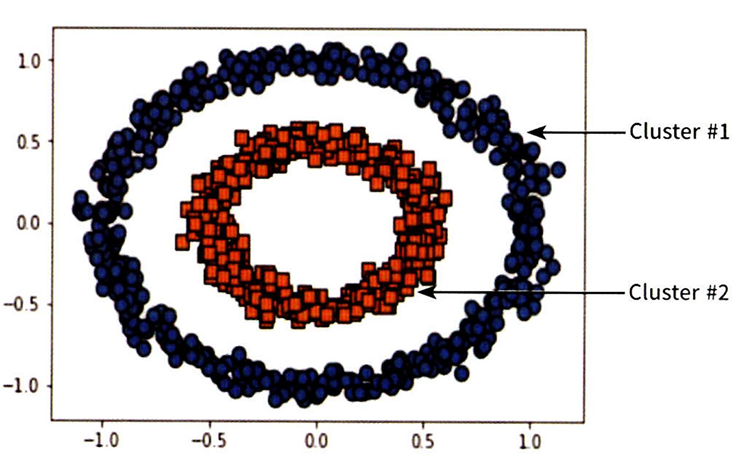
- DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화 수행
- DBCAN을 구성하는 가장 중요한 두 가지 파라미터: 입실론으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points
  - **입실론 주변 영역(epsilon)**: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  - **최소 데이터 개수(min points)**: 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
  - **핵심 포인트(Core Point)**: 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함
  - **이웃 포인트(Neighbor Point)**: 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함
  - **경계 포인트(Border Point)**: 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함
  - **잡음 포인트(Noise Point)**: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함  

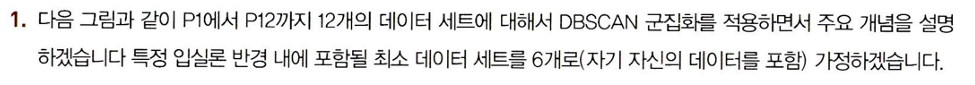
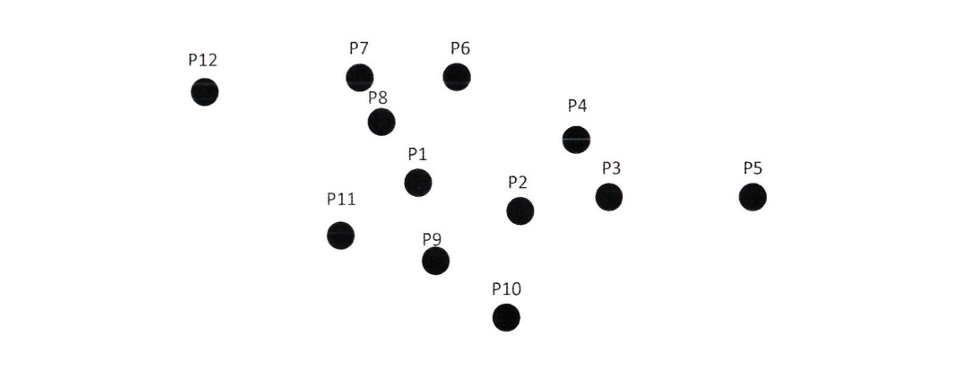
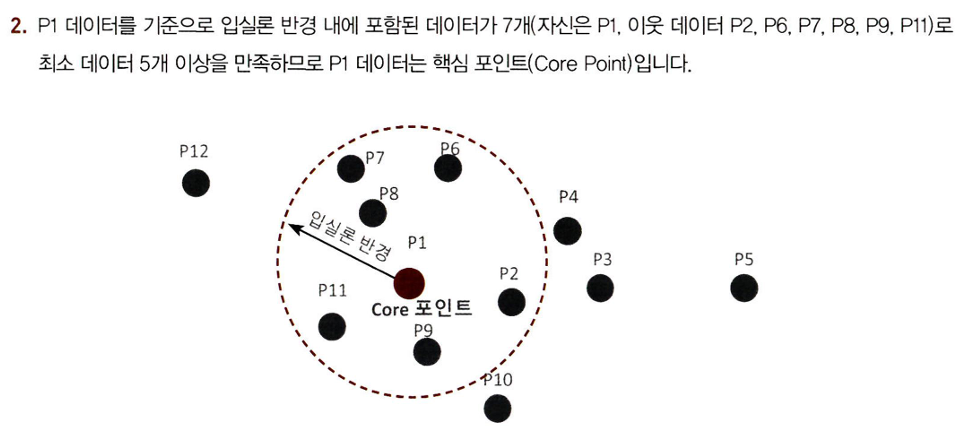
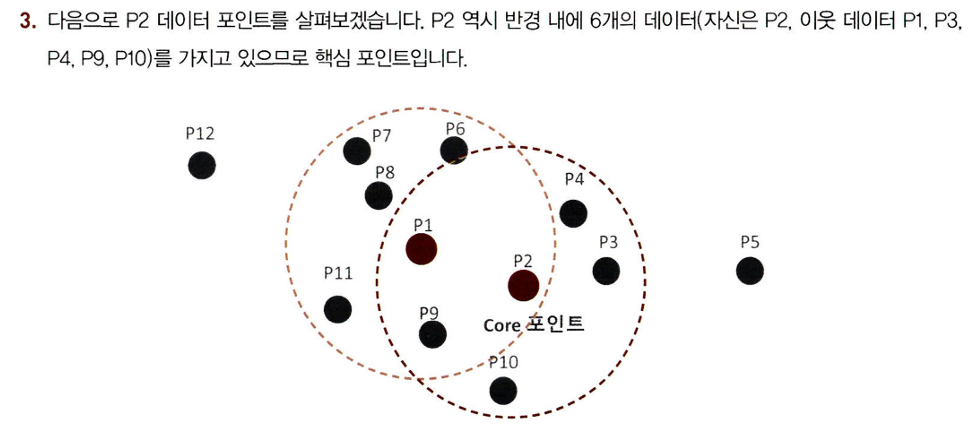
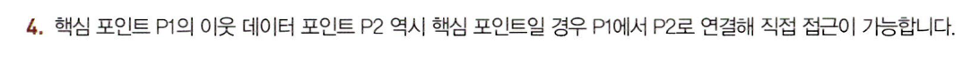
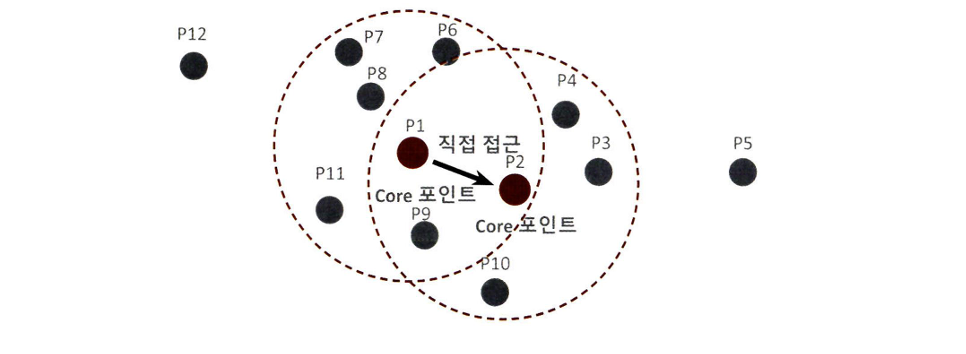
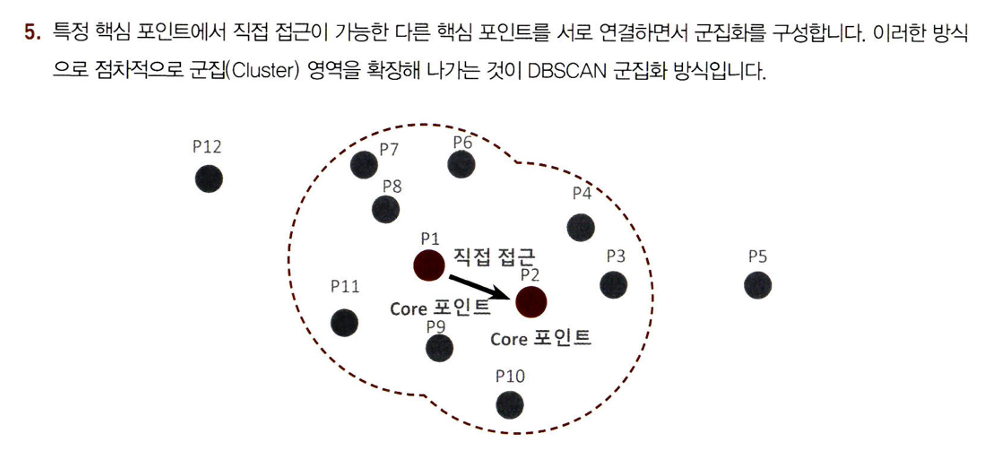
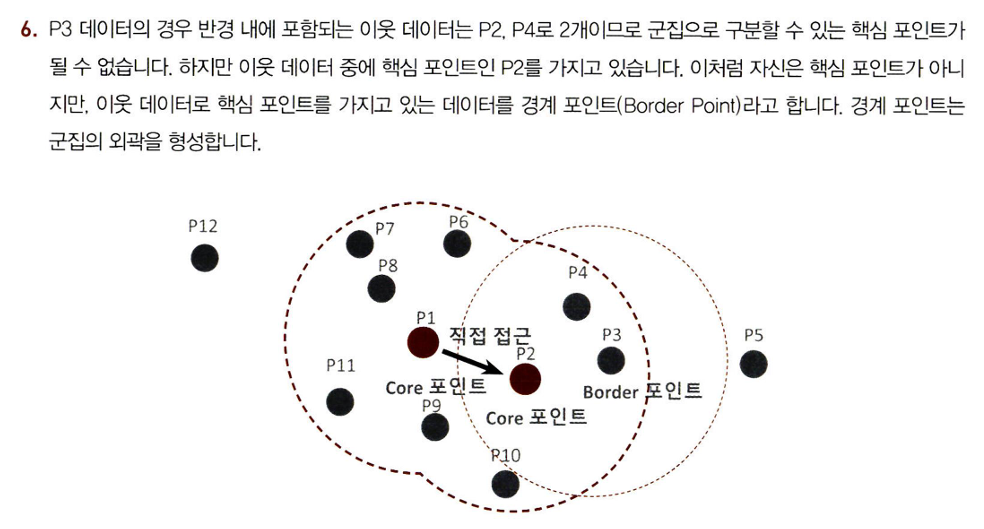
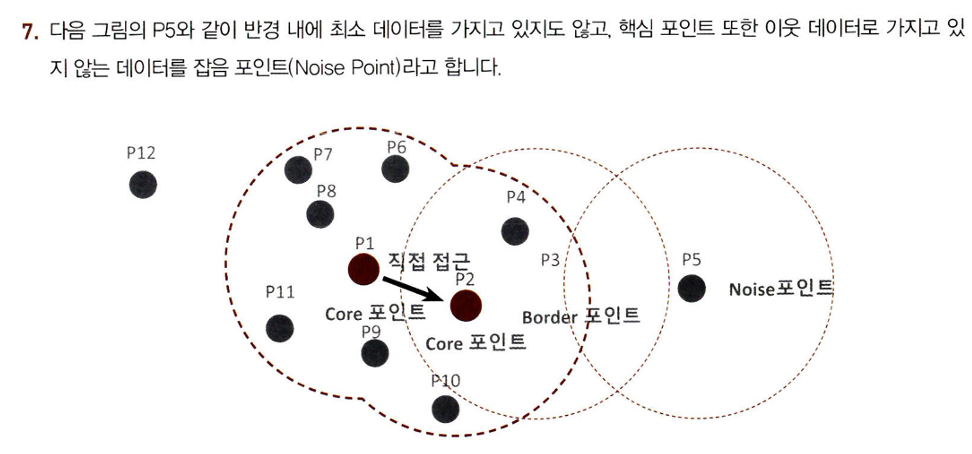

- DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식
- DBCAN 클래스의 주요 파라미터
  - **eps**: 입실론 주변 영역의 반경
  - **min_samples**: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미 (자신의 데이터 포함, 즉 min points + 1)

### **DBSCAN 적용하기 - 붓꽃 데이터 세트**

In [3]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')      # 일반적으로 eps 값으로는 1이하의 값을 설정
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result =  irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- dbscan_cluster: 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
- 따라서 위 붓꽃 데이터 세트는 DBCAN에서 0과 1 두 개의 군집으로 군집화되었음
- Target 값의 유형 3가지
- 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아님
- DBCAN은 군집의 개수를 알고리즘에 따라 자동 지정하므로 DBCAN에서 군집의 개수를 지정하는 것은 무의미

In [7]:

## 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

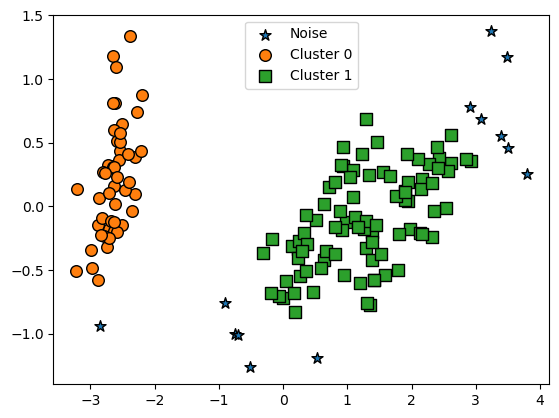

In [8]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 설정
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

- 별표로 표현된 값은 모두 노이즈
- PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러남
- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요함
- 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
- min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨
- 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


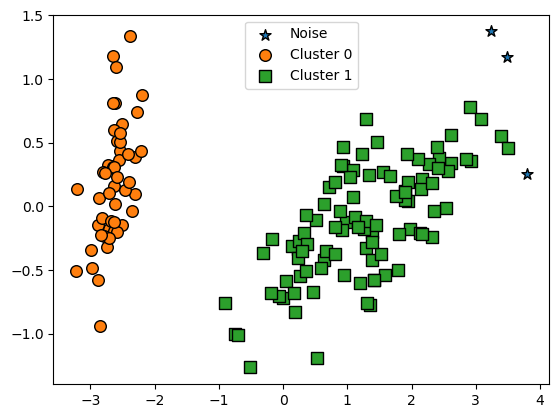

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 군집인 -1이 3개밖에 없음
- 기존에 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster1에 소속됨

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


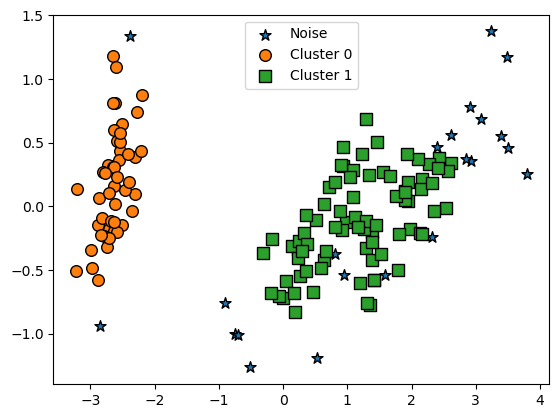

In [10]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터가 기존보다 많이 증가함

### **DBSCAN 적용하기 - make_circles() 데이터 세트**

- 이번에는 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교해보자
- 먼저 make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들자
- make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없음
- 파라미터 noise: 노이즈 데이터 세트의 비율
- 파라미터 factor: 외부 원과 내부 원의 scale 비율

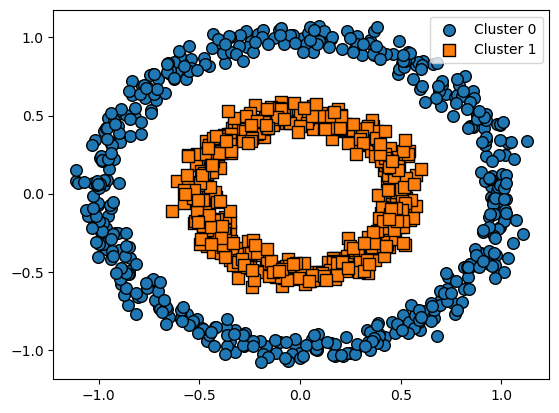

In [12]:
# 원 형태로 되어 있는 2차우언 데이터 세트 생성
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000, shuffle = True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함을 알 수 있음
- DBSCAN이 위 데이터 세트를 군집화한 결과를 보기 전에 먼저 K-평균과 GMM은 어떻게 이 데이터 세트를 군집화하는지 확인해보자

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\이희원\AppData\Local\Temp\ipykernel_19436\969065160.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


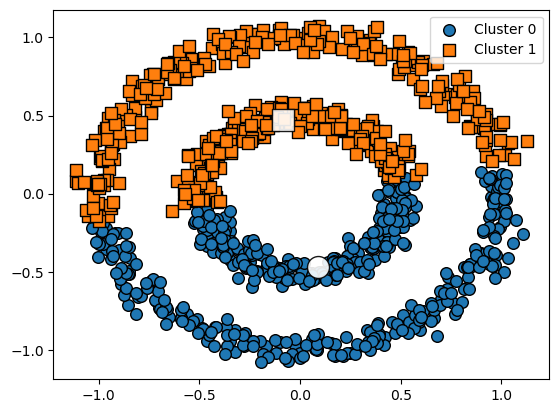

In [13]:
# KMeans로 make_circle() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됨
- 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


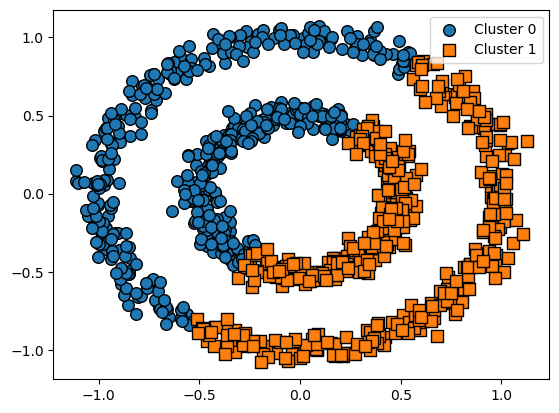

In [14]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했지만
- 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않음

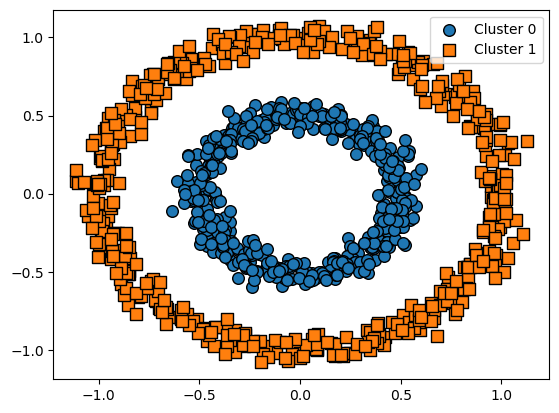

In [15]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음을 알 수 있음